In [1]:
Pkg.add("NBInclude")
using NBInclude
nbinclude("Logistic_Map.ipynb")
using LogisticMap

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of NBInclude
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
using PyPlot

In [10]:
x_o = 0.2
#x_lim = [0.4, 0.6]
r_step = .01
r_start = 2.0
r_end = 4.0
iterates = 800
discard = 400
R = r_start:r_step:r_end;

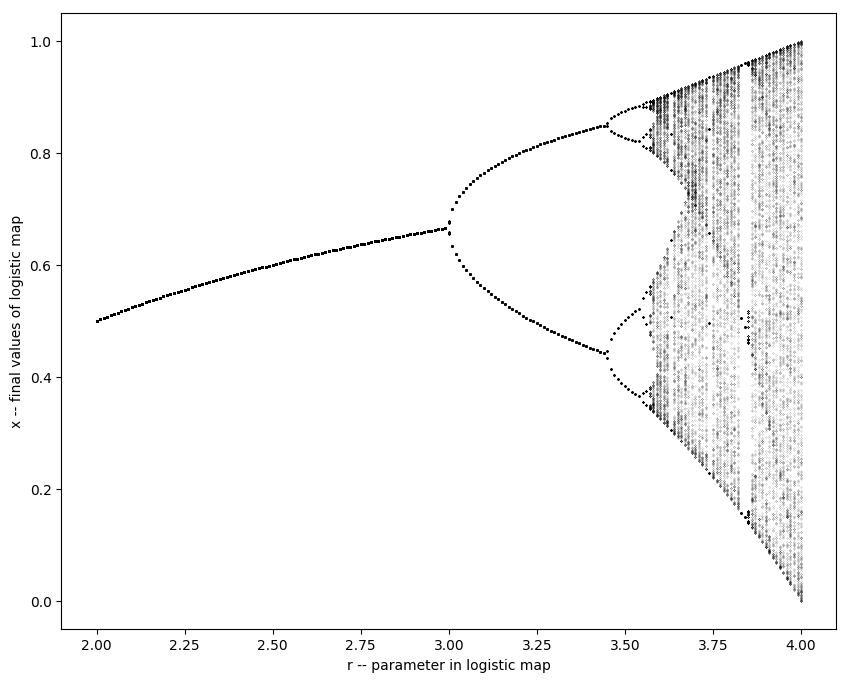

In [13]:
figure(figsize=(10,8))
for i = 1:size(R,1)
    f = logistic_loop(n=iterates, x_0=x_o, r=R[i])[discard:end]
    r_vec = ones(size(f,1),1)*R[i]
    plot(r_vec, f, linestyle="", marker="o", markersize=.1, color="k")
end
#ylim(x_lim)
xlabel("r -- parameter in logistic map")
ylabel("x -- final values of logistic map");

In [7]:
function number_unique_vector(vector)
    #note unique relies on Base.isequal, 
    #it appears to care about 14 decimal places!
    u = unique(vector)
    return size(u,1)
end 

number_unique_vector (generic function with 1 method)

In [93]:
function round_decimals(vector, digits)
    for i in eachindex(vector)
        vector[i] = round(vector[i], digits)
    end
    return vector
end

round_decimals (generic function with 1 method)

In [117]:
iterates = convert(Int64, 1e6)
discard = convert(Int64, 9.9e5)
m = logistic_loop(n=iterates, x_0=x_o, r = 2.9999)[discard:end];
m_rounded = round_decimals(m, 8)
number_unique_vector(m)

1

In [123]:
l_map(R) = logistic_loop(n=iterates, x_0=x_o, r=R)

l_map (generic function with 1 method)

# TODO
make a bisection algorithm that finds the bifurcatio points.
- make something function which take the R value and computes the # of unique values >> probably should be an object
- plug it into the below functio and get it to work


In [ ]:
function logistic_map_unique(R)
    iterates = convert(Int64, 1e6)
    discard = convert(Int64, 9.9e5)
    m = logistic_loop(n=iterates, x_0=x_o, r = R)[discard:end];
    m_rounded = round_decimals(m, 8)
    number_unique_vector(m)
end


In [142]:
function find_bifurcation_point(func, high, low, tol)
    # func -- function for whom the bif. pnt. will be found
    # high, low -- start value for a parameter of the map
    # tol -- when diff. between high and low is at or below thresh
    #           it is considered to be the bifurcation point.
    # Uses Bisection method..
    
    n_high = something(high)
    n_low = something(low)
    while high-low > tol
        center = high + low / 2.0
        n_unique = something(center)
        if n_unique  == n_low
            low = center
        elseif n_unique == n_high
            high = center
        elseif n_unique > n_high
            #this is the case where the transient has still not
            #died out!
            print("ERROR! Influence of transient too high")
            return
        end
    return n_high, n_low
    end
end


find_bifurcation_point (generic function with 1 method)